In [89]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
port_act=pd.read_excel('Portafolio Desarrollo Sostenible 06 de enero 2023.xlsx', sheet_name='Portafolio')
port_act.dropna(how='all',inplace=True, subset=['Consecutivo']) #Quita nulos que haya en la columna de Consecutivo
port_act = port_act.iloc[:-1, :] #Quita la última fila que corresponde a totales en Portafolio
columnas= port_act.columns.to_list() #nombres de las columnas en una lista
port_act

C:\Users\E0301558\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Consecutivo,Tipo Inversión,Regional,Departamento,Nombre corto del proyecto,Línea de Inversión,Activo 1,Agrupación Nivel 1,Valor Total Proyecto,Tier
0,VDS-005,Estratégica,Central,Cesar,"Construcción_de_placa_huella,_La_Gloria_(Cesar)",Infraestructura_Pública_y_Comunitaria,Poliductos,Obras_por_Impuestos,4352643236.444,1.000
1,VDS-010,Estratégica,Caribe,La_Guajira,"Ampliación_de_redes_de_acueducto,_Riohacha_(Gu...",Acceso_a_Servicios_Públicos,TAYRONA,Obras_por_Impuestos,7001595831.000,2.000
2,VDS-016,Estratégica,Catatumbo-Arauca,Arauca,Rehabilitación_de_la_Via_Tame_-_Corocoro_(Arauca),Infraestructura_Pública_y_Comunitaria,RONDON,Obras_por_Impuestos,26533429049.070,2.000
3,VDS-022,Estratégica,Catatumbo-Arauca,Norte_de_Santander,Fortalecimiento_institucional_mediante_la_adqu...,Infraestructura_Pública_y_Comunitaria,CAÑO_LIMON,Gestión_VDS,1564591809.000,2.000
4,VDS-036,Estratégica,Catatumbo-Arauca,Norte_de_Santander,"Mejoramiento_colegio_La_Esperanza,_Tibú_(Nte._...","Educación,_Deporte_y_Salud",TIBU,Gestión_VDS,1152526720.000,3.000
...,...,...,...,...,...,...,...,...,...,...
996,VDS-3787,Estratégica,Piedemonte,Casanare,"Festival_Mundial_del_Arraigo_Llanero_""Casanare...",Fortalecimiento_Institucional_y_Comunitario,FLOREÑA,Gestión_VDS,101061120.000,1.000
997,VDS-3788,Estratégica,Caribe,La_Guajira,Apoyo_a_la_atención_de_la_emergencia_invernal_...,Fortalecimiento_Institucional_y_Comunitario,No_Aplica,Gestión_VDS,1833736244.000,0.000
998,VDS-3789,Estratégica,Oriente,Meta,"Evento_lúdico,_recreativo_y_cultural_con_niños...",Fortalecimiento_Institucional_y_Comunitario,CAÑO_SUR,Gestión_VDS,182872970.000,1.000
999,VDS-3791,Obligatoria,Central,Santander,Talleres_de_Fortalecimiento_y_emprendimiento_d...,Fortalecimiento_Institucional_y_Comunitario,No_Aplica,Obligatorio,44343114.000,0.000


In [91]:
# Import module for k-protoype cluster. K prototype permite hacer el cluster con valores categóricos y númericos
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [92]:
#Normalizo el valor total del proyectos para que valores más grandes o muy pequeños no afecten
min_params = port_act['Valor Total Proyecto'].min()
max_params = port_act['Valor Total Proyecto'].max()
port_act['Valor Normalizado']= (port_act['Valor Total Proyecto'] - min_params) / (max_params- min_params)
port_act

,Consecutivo,Tipo Inversión,Regional,Departamento,Nombre corto del proyecto,Línea de Inversión,Activo 1,Agrupación Nivel 1,Valor Total Proyecto,Tier,Valor Normalizado
0,VDS-005,Estratégica,Central,Cesar,"Construcción_de_placa_huella,_La_Gloria_(Cesar)",Infraestructura_Pública_y_Comunitaria,Poliductos,Obras_por_Impuestos,4352643236.444,1.000,0.075
1,VDS-010,Estratégica,Caribe,La_Guajira,"Ampliación_de_redes_de_acueducto,_Riohacha_(Gu...",Acceso_a_Servicios_Públicos,TAYRONA,Obras_por_Impuestos,7001595831.000,2.000,0.121
2,VDS-016,Estratégica,Catatumbo-Arauca,Arauca,Rehabilitación_de_la_Via_Tame_-_Corocoro_(Arauca),Infraestructura_Pública_y_Comunitaria,RONDON,Obras_por_Impuestos,26533429049.070,2.000,0.458
3,VDS-022,Estratégica,Catatumbo-Arauca,Norte_de_Santander,Fortalecimiento_institucional_mediante_la_adqu...,Infraestructura_Pública_y_Comunitaria,CAÑO_LIMON,Gestión_VDS,1564591809.000,2.000,0.027
4,VDS-036,Estratégica,Catatumbo-Arauca,Norte_de_Santander,"Mejoramiento_colegio_La_Esperanza,_Tibú_(Nte._...","Educación,_Deporte_y_Salud",TIBU,Gestión_VDS,1152526720.000,3.000,0.020
...,...,...,...,...,...,...,...,...,...,...,...
996,VDS-3787,Estratégica,Piedemonte,Casanare,"Festival_Mundial_del_Arraigo_Llanero_""Casanare...",Fortalecimiento_Institucional_y_Comunitario,FLOREÑA,Gestión_VDS,101061120.000,1.000,0.002
997,VDS-3788,Estratégica,Caribe,La_Guajira,Apoyo_a_la_atención_de_la_emergencia_invernal_...,Fortalecimiento_Institucional_y_Comunitario,No_Aplica,Gestión_VDS,1833736244.000,0.000,0.032
998,VDS-3789,Estratégica,Oriente,Meta,"Evento_lúdico,_recreativo_y_cultural_con_niños...",Fortalecimiento_Institucional_y_Comunitario,CAÑO_SUR,Gestión_VDS,182872970.000,1.000,0.003
999,VDS-3791,Obligatoria,Central,Santander,Talleres_de_Fortalecimiento_y_emprendimiento_d...,Fortalecimiento_Institucional_y_Comunitario,No_Aplica,Obligatorio,44343114.000,0.000,0.001


In [93]:
#esto es para jugar con las variables y quitar las que no usaría en el clustering
df=port_act.drop(['Consecutivo', 'Nombre corto del proyecto','Valor Total Proyecto', "Activo 1", "Departamento","Tipo Inversión", "Agrupación Nivel 1"], axis = 1)
df

,Regional,Línea de Inversión,Tier,Valor Normalizado
0,Central,Infraestructura_Pública_y_Comunitaria,1.000,0.075
1,Caribe,Acceso_a_Servicios_Públicos,2.000,0.121
2,Catatumbo-Arauca,Infraestructura_Pública_y_Comunitaria,2.000,0.458
3,Catatumbo-Arauca,Infraestructura_Pública_y_Comunitaria,2.000,0.027
4,Catatumbo-Arauca,"Educación,_Deporte_y_Salud",3.000,0.020
...,...,...,...,...
996,Piedemonte,Fortalecimiento_Institucional_y_Comunitario,1.000,0.002
997,Caribe,Fortalecimiento_Institucional_y_Comunitario,0.000,0.032
998,Oriente,Fortalecimiento_Institucional_y_Comunitario,1.000,0.003
999,Central,Fortalecimiento_Institucional_y_Comunitario,0.000,0.001


In [94]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Regional', 'Línea de Inversión']
Categorical columns position  : [0, 1]


In [95]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()
dfMatrix

array([['Central', 'Infraestructura_Pública_y_Comunitaria', 1.0,
        0.07508601282766396],
       ['Caribe', 'Acceso_a_Servicios_Públicos', 2.0,
        0.12078773270032671],
       ['Catatumbo-Arauca', 'Infraestructura_Pública_y_Comunitaria', 2.0,
        0.45776559035108627],
       ...,
       ['Oriente', 'Fortalecimiento_Institucional_y_Comunitario', 1.0,
        0.003146004145720262],
       ['Central', 'Fortalecimiento_Institucional_y_Comunitario', 0.0,
        0.0007559830158879369],
       ['Sur', 'Educación,_Deporte_y_Salud', 2.0, 0.0006757902618157068]],
      dtype=object)

In [96]:
#print length of each array
print(len(dfMatrix))

1001


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19


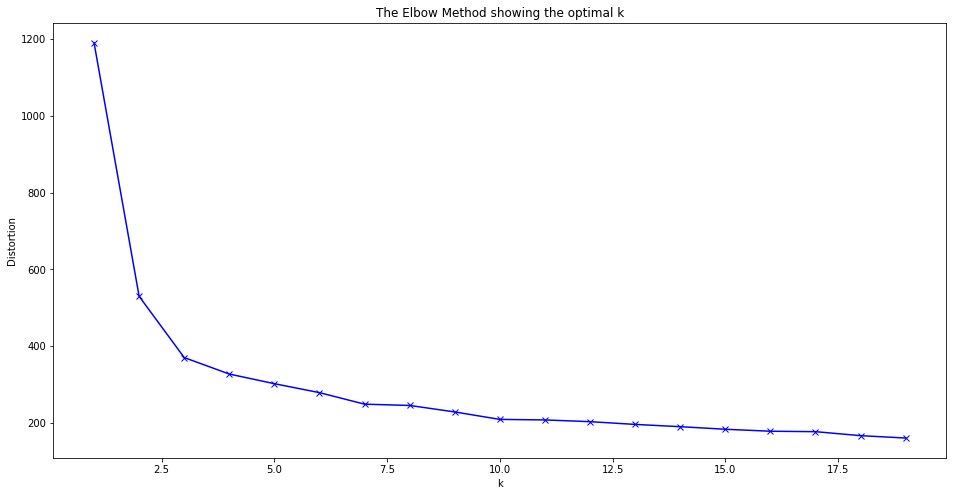

In [104]:
# Choose optimal K using Elbow method. Método para elegir el número óptimo de cluster
cost = []
for cluster in range(1, 20):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 20), 'Cost':cost})
# Data viz
plt.figure(figsize=(16,8))
plt.plot(df_cost['Cluster'], df_cost['Cost'], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [105]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 8, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([3, 5, 0, ..., 7, 2, 0], dtype=uint16)

In [106]:
# Cluster centroid. Los centros de cada cluster
kprototype.cluster_centroids_

array([['2.0', '0.020123063949918946', 'Sur',
        'Infraestructura_Pública_y_Comunitaria'],
       ['3.0', '0.02198370020372361', 'Catatumbo-Arauca',
        'Infraestructura_Pública_y_Comunitaria'],
       ['0.0', '0.03733087483586001', 'Orinoquía',
        'Fortalecimiento_institucional_y_comunitario'],
       ['1.0', '0.1438051729687397', 'Central',
        'Infraestructura_Pública_y_Comunitaria'],
       ['1.0', '0.04004350698239089', 'Central',
        'Educación,_Deporte_y_Salud'],
       ['2.0', '0.045843232402507636', 'Central',
        'Educación,_Deporte_y_Salud'],
       ['2.0', '0.03463401456362914', 'Orinoquía',
        'Fortalecimiento_institucional_y_comunitario'],
       ['1.0', '0.009404005483617863', 'Piedemonte',
        'Fortalecimiento_institucional_y_comunitario']], dtype='<U43')

In [107]:
# Check the iteration of the clusters created
kprototype.n_iter_

4

In [108]:
# Check the cost of the clusters created
kprototype.cost_

245.54984040515131

In [109]:
# Add the cluster to the dataframe. Nombrar cada cluster para identificarlos
df['Cluster Labels'] = kprototype.labels_
df['Segment'] = df['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth', 4:'Fifth', 5:'Sixth', 6:'Seventh',
                                          7:'Eighth'})
# Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First','Second','Third','Fourth','Fifth'
                                                      ,'Sixth','Seventh','Eighth'])

In [110]:
df

,Regional,Línea de Inversión,Tier,Valor Normalizado,Cluster Labels,Segment
0,Central,Infraestructura_Pública_y_Comunitaria,1.000,0.075,3,Fourth
1,Caribe,Acceso_a_Servicios_Públicos,2.000,0.121,5,Sixth
2,Catatumbo-Arauca,Infraestructura_Pública_y_Comunitaria,2.000,0.458,0,First
3,Catatumbo-Arauca,Infraestructura_Pública_y_Comunitaria,2.000,0.027,0,First
4,Catatumbo-Arauca,"Educación,_Deporte_y_Salud",3.000,0.020,1,Second
...,...,...,...,...,...,...
996,Piedemonte,Fortalecimiento_Institucional_y_Comunitario,1.000,0.002,7,Eighth
997,Caribe,Fortalecimiento_Institucional_y_Comunitario,0.000,0.032,2,Third
998,Oriente,Fortalecimiento_Institucional_y_Comunitario,1.000,0.003,7,Eighth
999,Central,Fortalecimiento_Institucional_y_Comunitario,0.000,0.001,2,Third


In [80]:
df['Segment'].value_counts()

First      248
Fifth      215
Third      180
Sixth      129
Seventh    111
Second      77
Fourth      65
Name: Segment, dtype: int64

In [81]:
#Unir esos nombres con los proyectos
df=pd.merge(df, port_act[['Consecutivo','Nombre del Proyecto', 'Valor Total Proyecto']], left_index=True, right_index=True)

KeyError: "['Nombre del Proyecto'] not in index"

In [ ]:
#Exportar a excel
df.to_excel('Clustering.xlsx', sheet_name='Python', index = False)